In [46]:
import cv2
import numpy as np
from IPython.display import Image, display

#Read image
img = cv2.imread('newform.jpeg')
img_copy1 = img.copy()

#Create MSER Object
mser = cv2.MSER_create()

#Convert to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#detect regions in gray scale image
regions,boxes = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
for hull in hulls:
    x,y,w,h = cv2.boundingRect(hull)
    cv2.rectangle(img_copy1,(x,y),(x+w,y+h),(255,0,0),1)


cv2.imwrite('test.jpg',img_copy1)

True

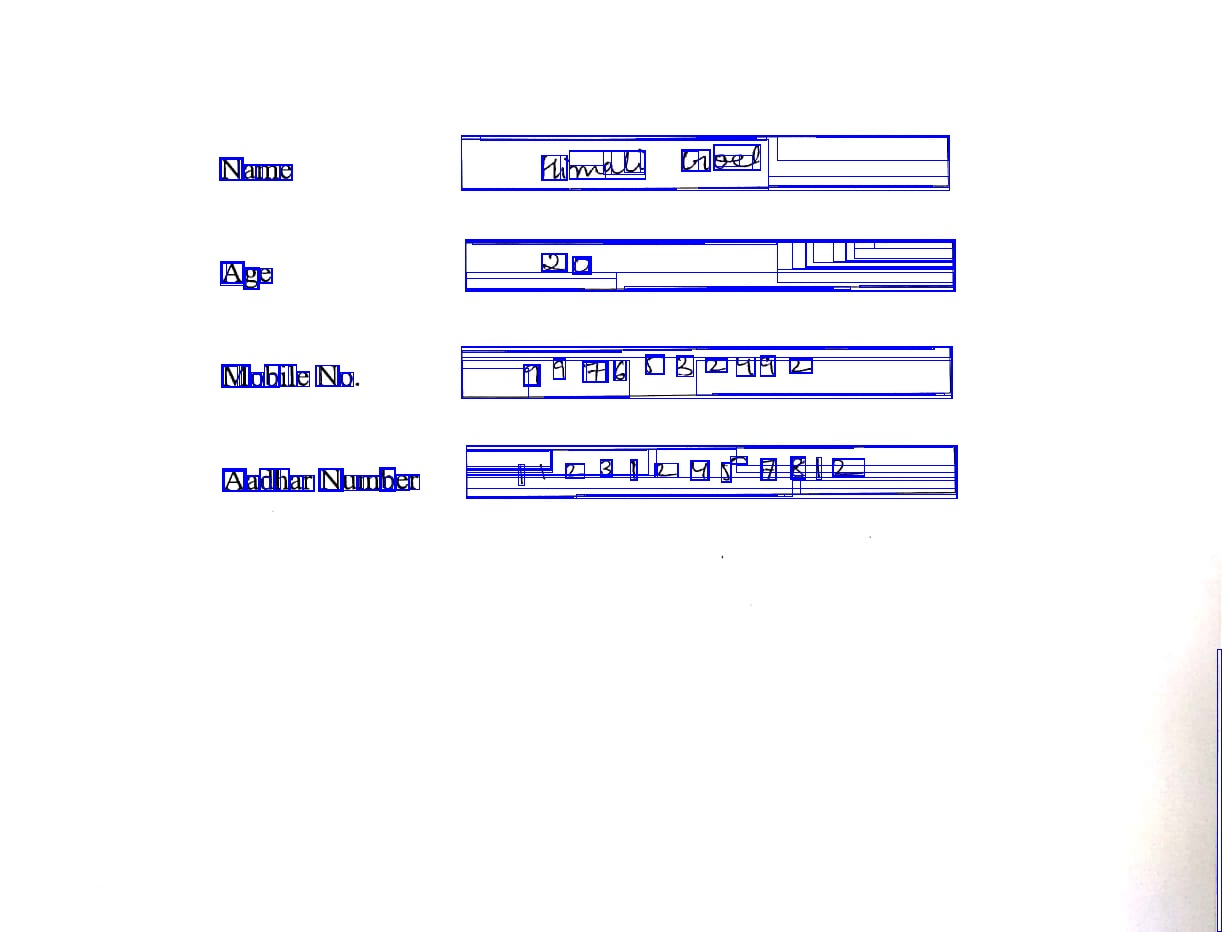

In [47]:
Image('test.jpg')

In [48]:
print(len(img_copy1[0])*len(img_copy1[1]))
mser = cv2.MSER_create(_max_variation=0.1 )

#Convert to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#detect regions in gray scale image
regions,boxes = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
for hull in hulls:
    x,y,w,h = cv2.boundingRect(hull)
    cv2.rectangle(img_copy1,(x,y),(x+w,y+h),(255,0,0),1)


cv2.imwrite('test.jpg',img_copy1)

1493284


True

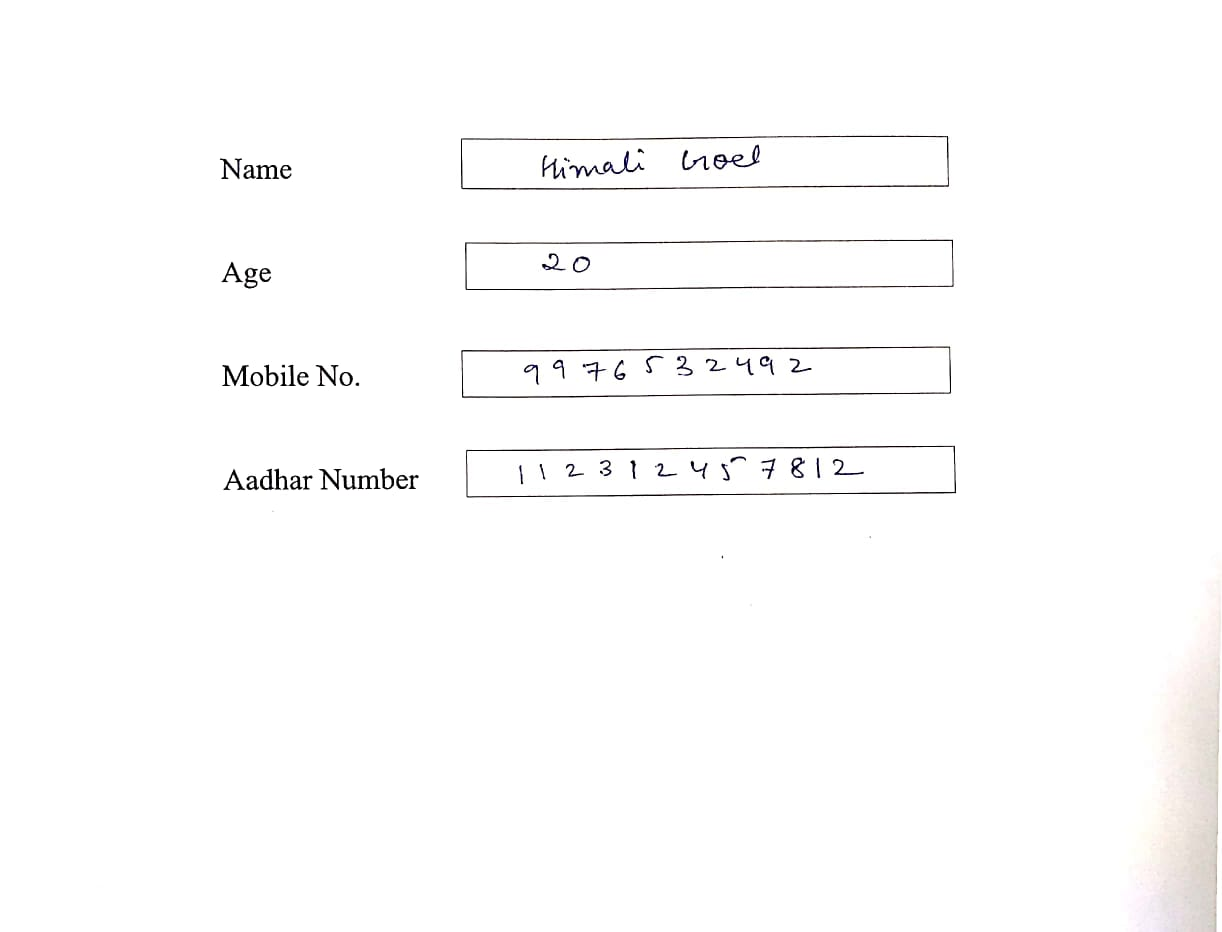

In [49]:
Image('newform.jpeg')

In [53]:
import matplotlib.pyplot as plt

#Read image
img = cv2.imread('newform.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_copy = gray.copy()

k = 10
line_thickness = 10
line_hieght = 100
hline_length = 200
predicted_rect_cord = []

for i in range(0,gray.shape[0]-(gray.shape[0]%k),k):
    temp = gray[i:i+k][:]
    arr = np.zeros(gray.shape[1])
    for j in range(gray.shape[1]):
        arr[j] = (temp[:,j] < 123).sum()
    
    predicted_hline = []
    last_corner = None
    line_continue = False
    for j in range(gray.shape[1] - 1) :
        if abs(arr[j+1] - arr[j+1]) <= 1 and arr[j] != 0 :
            predicted_rect.append(j)
            if not line_continue :
                line_continue = True
                last_corner = j
        else :
            if line_continue :
                line_continue = False
                predicted_hline.append((last_corner,j))

    for i in range(len(predicted_hline) - 1, -1, -1) :
        x1,x2 = predicted_hline[i] 
        if abs(x2-x1) < hline_length :
            del predicted_hline[i]
    
    print(predicted_hline)
    for end_pts in predicted_hline :
        x1,x2 = end_pts
        temp = gray[i:i+line_hieght][x1:x1+line_thickness]
        arr = np.zeros(line_hieght)
        for j in range(line_hieght):
            arr[j] = (temp[:,j] < 123).sum()
        
        predicted_vline = []
        last_corner = None
        line_continue = False
        
        for j in range(line_hieght - 1) :
            if abs(arr[j+1] - arr[j+1]) <= 1 and arr[j] != 0 :
                predicted_rect.append(j)
                if not line_continue :
                    line_continue = True
                    last_corner = j
            else :
                if line_continue :
                    line_continue = False
                    predicted_hline.append((last_corner,j))
        print(predicted_hline)

        
#     shape
#     if len(np.unique(arr)) > 5:
#         gray_copy[i:i+k][:] = np.full((k,gray.shape[1]),255)
    
cv2.imwrite('newtest.jpg',gray_copy)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(477, 766)]
[(477, 766)]
[]
[]
[]
[]
[(461, 949)]
[(461, 949)]
[]
[]
[]
[]
[]
[(472, 776)]
[(472, 776)]
[]
[]
[]
[(466, 953)]
[(466, 953)]
[]
[]
[]
[]
[]
[(619, 950)]
[(619, 950)]
[]
[]
[]
[]
[(462, 951)]
[(462, 951)]
[]
[]
[]
[]
[(544, 955)]
[(544, 955)]
[]
[]
[]
[]
[(576, 956)]
[(576, 956)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


True

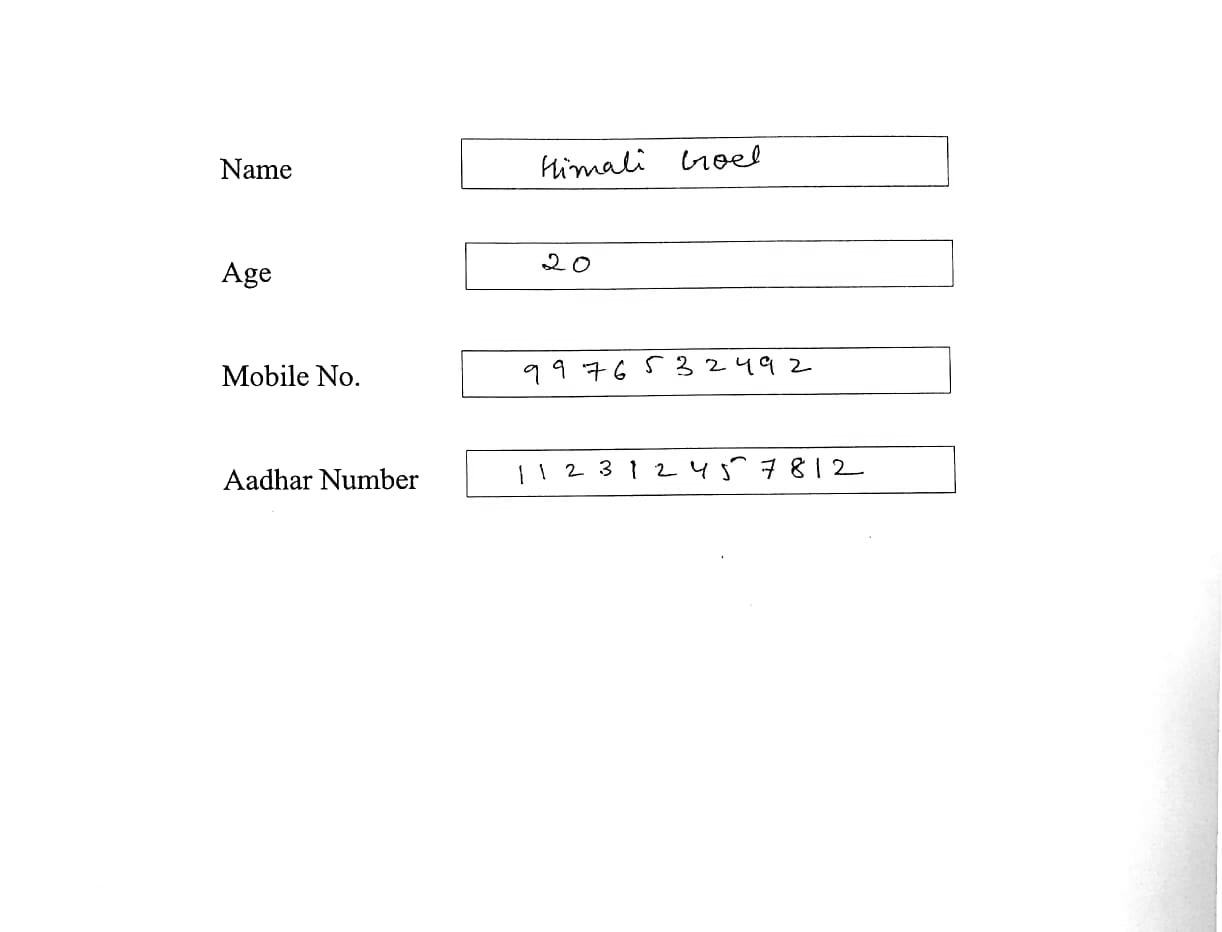

In [51]:
Image('newtest.jpg')